# MAD-X Simulations

This section is based on the **BL2_TDC** ATF example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

In [1]:
%run -i ../../../examples/prepare_flyer_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.madx_flyer import MADXFlyer
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("madx", "00000001")
classes, objects = create_classes(connection.data,
                                  connection=connection,
                                  extra_model_fields=["rpnVariables"])
globals().update(**objects)

madx_flyer = MADXFlyer(connection=connection,
                       root_dir="/tmp/sirepo-bluesky-data",
                       report="elementAnimation250-20")

def madx_plan(parameter=ihq1, value=2.0):
    yield from bps.mv(parameter.value, value)
    return (yield from bp.fly([madx_flyer]))

(uid,) = RE(madx_plan())  # noqa F821
hdr = db[uid]
tbl = hdr.table(stream_name="madx_flyer", fill=True)
print(tbl)



Transient Scan ID: 1     Time: 2022-10-27 19:10:36
Persistent Unique Scan ID: '97d96489-c56b-4969-b0a9-81bf49da4837'


New stream: 'madx_flyer'





                                 time madx_flyer_NAME madx_flyer_S  \
seq_num                                                              
1       2022-10-27 19:10:44.855964899           HPOP1          0.2   
2       2022-10-27 19:10:44.856010675           HPOP2         1.34   
3       2022-10-27 19:10:44.856031656           HPOP3         4.76   
4       2022-10-27 19:10:44.856048346           HPOP4          5.9   
5       2022-10-27 19:10:44.856065750           HPOP5          7.4   
6       2022-10-27 19:10:44.856081486           HPOP6         8.54   
7       2022-10-27 19:10:44.856097460             FP1      10.1405   
8       2022-10-27 19:10:44.856121540             FP2     12.91425   
9       2022-10-27 19:10:44.856136084             FP3     19.47205   
10      2022-10-27 19:10:44.856224298             IP1     20.58655   
11      2022-10-27 19:10:44.856245041             IP2     21.38655   
12      2022-10-27 19:10:44.856261492             IP3     22.24655   
13      2022-10-27 1

/usr/share/miniconda3/envs/sirepo-bluesky-py3.9/lib/python3.9/site-packages/event_model/__init__.py:208: UserWarning: The document type 'bulk_events' has been deprecated in favor of 'event_page', whose structure is a transpose of 'bulk_events'.
  warnings.warn(


### Get the original data file

In [2]:
import os
import tfs

for name, doc in hdr.documents():
    if name == "resource":
        resource_doc = doc
        print(resource_doc)
filename = os.path.join(resource_doc["root"], resource_doc["resource_path"])
df = tfs.read(filename)


Resource
path_semantics  : posix                                   
resource_kwargs :
resource_path   : 2022/10/27/a5970ba0-1161-45ac-b9a1-88c759939f1c.tfs
root            : /tmp/sirepo-bluesky-data                
run_start       : 97d96489-c56b-4969-b0a9-81bf49da4837    
spec            : madx                                    
uid             : d1909000-e6aa-4f1d-9c76-e7b0e48c5e93    


In [3]:
df

,NAME,S,BETX,ALFX,BETY,ALFY,DX,DY
0,HPOP1,0.20000,10.408000,-1.040000,10.408000,-1.040000,0.000000,0.0
1,HPOP2,1.34000,22.363086,-3.624539,3.896223,3.718548,0.000000,0.0
2,HPOP3,4.76000,54.549050,-5.786562,22.973579,-9.296722,0.000000,0.0
3,HPOP4,5.90000,68.563980,-6.507236,49.115909,-13.635146,0.000000,0.0
4,HPOP5,7.40000,89.508071,-7.455492,98.584025,-19.343598,0.000000,0.0
5,HPOP6,8.54000,307.485642,112.990513,5.817319,16.215083,0.000000,0.0
6,FP1,10.14050,14.881980,39.607182,70.131390,-56.398820,-0.298472,0.0
7,FP2,12.91425,401.917445,160.547923,73.489676,-38.613951,-1.636568,0.0
8,FP3,19.47205,87.688819,-43.438609,201.619048,61.872929,0.255697,0.0
9,IP1,20.58655,172.370137,-10.636506,89.111760,38.758051,0.000809,0.0


Text(0, 0.5, 'betx, bety [m]')

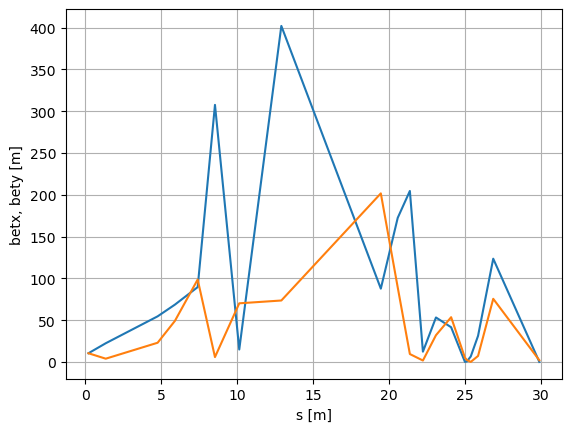

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df["S"], df["BETX"])
plt.plot(df["S"], df["BETY"])
plt.grid()
plt.xlabel("s [m]")
plt.ylabel("betx, bety [m]")

### Screenshot from Sirepo website

![image.png](../../../images/madx_twiss2_file.png)